## 人工神经网络——Regression example

In [1]:
from sklearn import datasets

'''
The regression example of the Boston dataset.
'''

boston = datasets.load_boston()

X, y = boston.data, boston.target.reshape(-1, 1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [2]:
print(X_train.shape)
print(y_train.shape)

(404, 13)
(404, 1)


### 调用 DeeplearningRegression 里面的 ANN 框架

In [3]:
from frames.DeeplearningRegression import ANN

'''
参数说明：
hidden_layers: 每层神经元个数，传入 list
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128
'''
ann = ANN(hidden_layers=[128, 64], learning_rate=[1e-3, 1e-5, 1e-7], epoch=10000, batch_size=256) # 采用梯度衰减策略

In [4]:
ann.fit(X_train, y_train)

Training... epoch: 100, loss: 28.249006271362305
Training... epoch: 200, loss: 15.304084777832031
Training... epoch: 300, loss: 12.330802917480469
Training... epoch: 400, loss: 8.659722328186035
Training... epoch: 500, loss: 10.242937088012695
Training... epoch: 600, loss: 8.380364418029785
Training... epoch: 700, loss: 6.366713523864746
Training... epoch: 800, loss: 6.72205924987793
Training... epoch: 900, loss: 8.118117332458496
Training... epoch: 1000, loss: 6.960887908935547
Training... epoch: 1100, loss: 8.611330032348633
Training... epoch: 1200, loss: 6.224942684173584
Training... epoch: 1300, loss: 7.141670227050781
Training... epoch: 1400, loss: 4.958449363708496
Training... epoch: 1500, loss: 4.833189487457275
Training... epoch: 1600, loss: 3.5260207653045654
Training... epoch: 1700, loss: 5.356499195098877
Training... epoch: 1800, loss: 5.4151387214660645
Training... epoch: 1900, loss: 4.391218662261963
Training... epoch: 2000, loss: 4.324287414550781
Training... epoch: 2100,

### 调用 score 得到结果，调用 predict 得到值

In [5]:
ann.score(X_test, y_test)

mse: 14.01568866238318, rmse: 3.7437532854587494, mae: 2.5027633554795212, r2: 0.8660485778090674


### 调用 result_plot 保存结果图

In [6]:
import os

save_path = './Example_save_resultes/Regression/save_pngs'
if not os.path.exists(save_path):
    os.makedirs(save_path)
    
save_png = os.path.join(save_path, 'ann_picture.png')
ann.result_plot(X_test, y_test, save_file=save_png)

Save the picture successfully!


### 保存模型结果, 这里有两个参数，统计 dataset 是否使用了 标准化 和 pca 的预处理

In [7]:
results_file = './Example_save_resultes/Regression/ann_result.csv'
ann.save_result(results_file, is_standard=False, is_PCA=False)

Save results success!


### 调用 loss_plot 查看训练过程， loss 的变化

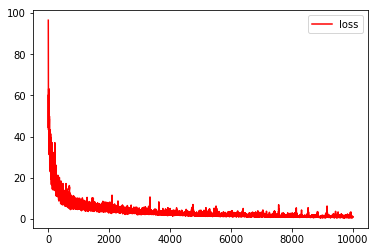

In [8]:
ann.loss_plot()